# ENSEMBLE LEARNING AND RANDOM FORESTS

If we aggregate the predictions of a group of predictors (such as classifiers or regressors), we will often get better predictions than with the best individual predictor.

<b>Ensemble</b> - Group of Predictors.<br>
<b>Ensemble method</b> - Ensemble learning algorithms.<br>

### Voting Classifiers
- A very simple way to create an even better classifier is to aggregate the predictions of multiple classifiers and predict the class that gets the <b>most votes</b>. 
- This majority-vote classifier is called a <b>Hard Voting Classifier</b>.

Ensemble methods works best when the predictors are as independent from one another as possible.
- Generaly classifiers dont make uncorrelated errors, since they are trained on the same data. They are likely to make the same types of errors, so there will be many majority votes for the wrong class, reducing the ensemble’s accuracy.
- One way to get <b>diverse classifiers</b> is to train them using very <b>different algorithms</b>. This increases the chance that they will make very different types of errors, improving the ensemble’s accuracy.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples = 2000, noise = 0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard'
 )
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [2]:
# Check accuracy of each classifier, compared to voting classifier
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
# The voting classifier slightly outperforms all the individual classifiers in most of the cases.

LogisticRegression 0.845
RandomForestClassifier 0.8633333333333333
SVC 0.8683333333333333
VotingClassifier 0.8616666666666667


#### Soft Voting
VotingClassifier(.. , voting = 'soft')
- Soft voting is possible if all classifiers are able to estimate class probabilities (i.e., they have a predict_proba() method).
- It predicts the class with the highest class probability, averaged over all the individual classifiers.
- Better than hard voting beacuse it gives weightage to more confident prediction.

In [3]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
# SVC does not give prediction probability by default
# We have to give "probability" hyperparameter as true
svm_clf = SVC(probability = True)
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='soft'
 )
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [4]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.845
RandomForestClassifier 0.85
SVC 0.8683333333333333
VotingClassifier 0.87


### Bagging and Pasting
Use the same training algorithm for every predictor, but to train them on different random subsets of the training set.

- <b>Bagging</b> : bootstrap aggregating, sampling is performed with replacement (Once selected sample is kept back in dataset for next random selection).
- <b>Pasting</b> : sampling is performed without replacement (Once selected sample is not included in next random selection).
---------------------------------------------------------------
- The aggregation function is typically the statistical mode (i.e., the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression.
- Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance.
- Generally, the net result is that the ensemble has a <b>similar bias but a lower variance</b> than a single predictor trained on the original training set.

Bagging and pasting scale very well.
- Predictors can all be trained in parallel, via different CPU cores or even different servers.
- Similarly, predictions can be made in parallel.


In [5]:
# Implementation on sklearn
# BaggingClassifier for class and BaggingRegressor for regression.
# n_estimators : number of classifiers 
# max_samples : 100 training instances randomly
# max_samples can alternatively be set to a float between 0.0 and 1.0, in which case the max number of instances to sample is equal to the size of the training set times max_samples
# bootstrap=False : Pasting, bootstrap=True : Bagging
# n_jobs : number of CPU cores to use for training and predictions(–1 tells Scikit-Learn to use all available cores).
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
    )
# BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities (i.e., if it has a predict_proba() method)
bag_clf.fit(X_train, y_train)
y_pred_bagging = bag_clf.predict(X_test)

# Single Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Bagging", accuracy_score(y_test, y_pred_bagging))
print("Single Decision tree", accuracy_score(y_test, y_pred))

Bagging 0.865
Single Decision tree 0.8316666666666667


In [6]:
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
def make_decision_boundary(X, y, names, classifiers):
    figure = plt.figure(figsize=(12, 5))
    h = 0.02
    i  = 1

    # Necessary for creating colour composition for each and every point in space
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Define color for class boundary area and datapoints
    cm_classes = ListedColormap(['#FFA500', '#00FFFF'])
    cm_points = ListedColormap(['#FF0000', '#0000FF'])

    # just plot the dataset first
    ax = plt.subplot(1, len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_points, alpha=0.7)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, len(classifiers) + 1, i)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm_classes, alpha=.8)

        # Plot also the training points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_points, alpha=0.6, linewidths=1, edgecolors="black")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        i += 1

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

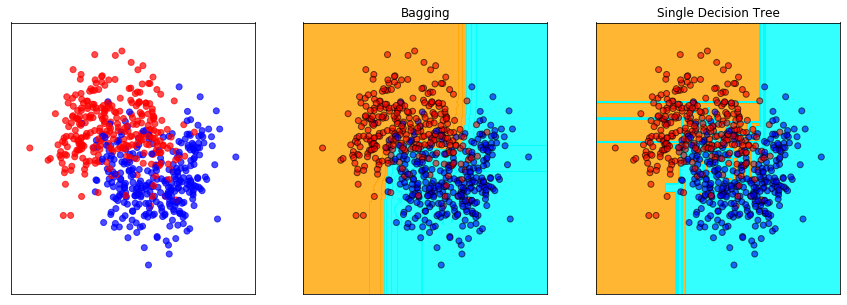

In [7]:
names = ["Bagging", "Single Decision Tree"]
classifiers = [bag_clf, clf]
# Decision boundary comparrision of bagging and single decision tree
make_decision_boundary(X_test, y_test, names, classifiers)

- The ensemble’s predictions will likely generalize much better than the single Decision Tree’s predictions: the ensemble has a comparable bias but a smaller variance.
- Ensemble makes roughly the same number of errors on the training set, but the decision boundary is less irregular.
------------------------------------------------------------------------------------------------
- <b>Bootstrapping</b> introduces a bit <b>more diversity in the subsets</b> that each predictor is trained on, so bagging ends up with a slightly higher bias than pasting.
- But this also means that predictors end up being less correlated so the ensemble’s <b>variance is reduced</b>.
- Overall, <b>bagging</b> often results in better models, which explains why it is <b>generally preferred</b>.

### Out-of-Bag Evaluation
- With <b>bagging</b>(bootstrap=True), some instances may be sampled several times for any given predictor, while others may not be sampled at all.
- only about 63% of the training instances are sampled on average for each predictor. The remaining 37% of the training instances that are not sampled. (confirm this***)
- These instances which are not used for training is known as <b>out-of-bag (oob) instances</b>.
- We can use this oob instances as a validation set for scoring.

In [8]:
# oob_score can only be used when bootstrap is true, because there is no oob instances in pasting method.
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred_bagging = bag_clf.predict(X_test)

print('Out of Bag Score -', bag_clf.oob_score_)
print('Accuracy on test data', accuracy_score(y_test, y_pred_bagging))

Out of Bag Score - 0.8378571428571429
Accuracy on test data 0.85


In [9]:
# The oob decision function for *each training instance* is also available through the oob_decision_function_ variable.
# since the base estimator has a predict_proba() method, the decision function returns the class probabilities for each training instance.
bag_clf.oob_decision_function_
# eg - 14.7% chance that first instance is in class 1, 85.3% chance that it belongs to class 2.

array([[1.        , 0.        ],
       [0.82446809, 0.17553191],
       [0.01142857, 0.98857143],
       ...,
       [0.        , 1.        ],
       [0.86813187, 0.13186813],
       [0.12234043, 0.87765957]])

### Random Patches and Random Subspaces
- The BaggingClassifier class supports <b>sampling the features</b> as well. This is controlled by two hyperparameters: <b>max_features</b> and <b>bootstrap_features</b>.

#### Random Patches method
- Sampling both training instances and features.
- bootstrap = True, max_samples < 1.0, bootstrap_features = True, max_features < 1.

#### Random Subspaces method
- Keeping all training instances but sampling features.
- bootstrap = False, max_samples = 1.0, bootstrap_features = True, max_features < 1.

Sampling features results in even more predictor diversity, trading a <b>bit more bias for a lower variance</b>.

In [10]:
# Random Patches method
bag_patches = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, max_samples = 0.3, bootstrap_features = True, max_features = 0.5)
bag_patches.fit(X_train, y_train)
y_pred_patches = bag_patches.predict(X_test)
print('Accuracy of random patching :', accuracy_score(y_test, y_pred_patches))

# Random Subspaces method
bag_subspaces = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=False, n_jobs=-1, max_samples = 1, bootstrap_features = True, max_features = 0.5)
bag_subspaces.fit(X_train, y_train)
y_pred_subspaces = bag_subspaces.predict(X_test)
print('Accuracy of random patching :', accuracy_score(y_test, y_pred_subspaces))

Accuracy of random patching : 0.835
Accuracy of random patching : 0.49166666666666664


### Random Forests
RandomForestClassifier, RandomForestRegressor<br>
- Generally trained via the bagging method (or sometimes pasting), typically with max_samples set to the size of the training set.
- More convenient and optimized for Decision Trees
- With a few exceptions, a RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.
- Some notable hyperparameters of BaggingClassifier that are not in RandomForestClassifier :
    - Splitter is absent (forced to "random")
    - presort is absent (forced to False)
    - max_samples is absent (forced to 1.0)
    - base_estimator is absent (forced to DecisionTreeClassifier with the provided hyperparameters).
    
The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features.<br> This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model.

In [11]:
from sklearn.ensemble import RandomForestClassifier
# 500 trees (each limited to maximum 16 nodes), using all available CPU cores.
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print('Accuracy of random forest :', accuracy_score(y_test, y_pred_rf))

Accuracy of random forest : 0.86


In [12]:
# BaggingClassifier that is roughly equivalent to the above RandomForestClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
 )
# Splitter = 'random' gives it the randomness of random forest, refer to the above description of random foreest.
bag_clf.fit(X_train, y_train)
y_pred_bagging = bag_clf.predict(X_test)
print('Accuracy from Bagging :', accuracy_score(y_test, y_pred_bagging))

Accuracy from Bagging : 0.87


###  Extremely Randomized Trees Ensemble (Extra-Trees)
ExtraTreesClassifier, ExtraTreesRegressor<br>
<b>Random Forest</b> - At each node only a random subset of the features is considered for splitting.<br>
<b>Extra-Trees</b> - Using <b>random thresholds</b> for each feature rather than searching for the best possible thresholds.
- Once again, this trades more bias for a lower variance.
- It also makes Extra-Trees much faster to train than regular Random Forests since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree.
----------------------------------------------------------------------------------------------------------------------
- The only way to know which will perform better, RandomForestClassifier or ExtraTreesClassifier, is to try both and compare them using cross-validation (and tuning the hyperparameters using grid search).

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
# Random threshold at each node
# 1000 trees (each limited to maximum 16 nodes), using all available CPU cores.
extree_clf = ExtraTreesClassifier(n_estimators=1000, max_leaf_nodes=16, n_jobs=-1)
extree_clf.fit(X_train, y_train)
y_pred_rf = extree_clf.predict(X_test)
print('Accuracy of Extra-Trees :', accuracy_score(y_test, y_pred_rf))

Accuracy of Extra-Trees : 0.8683333333333333


### Feature Importance
- In a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all).
- It is therefore possible to get an estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest.

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09027753951975961
sepal width (cm) 0.022518156876205477
petal length (cm) 0.44790695106569667
petal width (cm) 0.4392973525383384


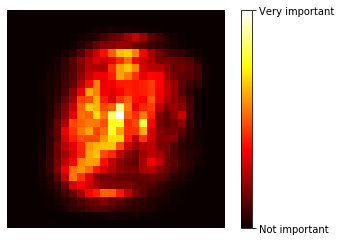

In [15]:
# MNIST set - 70000 small images of handwritten digits
# We can always use random forest as first step to get feature importance, useful in feature selection step

from matplotlib import cm
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(mnist['data'], mnist['target'])

image  = rnd_clf.feature_importances_.reshape(28,28)
plt.imshow(image, cmap = cm.hot, interpolation="nearest")
plt.axis("off")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

### Boosting
Originally called "hypothesis boosting".<br>
The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.
- Adaptive Boosting (AdaBoost)
- Gradient Boosting

### AdaBoost
One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases.
- The relative weight of misclassified training instances is increased after each prediction.
- This sequential learning technique has some similarities with Gradient Descent, except that instead of tweaking a single predictor’s parameters to minimize a cost function, AdaBoost adds predictors to the ensemble, gradually making it better.
- Ensemble makes predictions very much like bagging or pasting, except that predictors have different weights depending on their overall accuracy on the weighted training set.
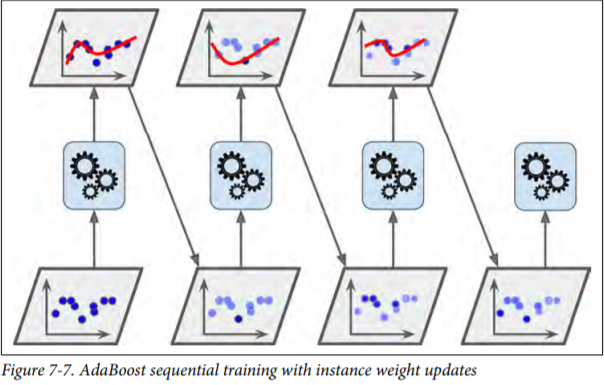
----------------------------------------------------------------------------------------------------------------------------
<b>Drawback</b> - It cannot be parallelized (or only partially), since each predictor can only be trained after the previous predictor has been trained and evaluated. As a result, it does not scale as well as bagging or pasting.<br>


#### AdaBoost Algorithm
Weighted error rate of the $j^\text{th}$ predictor

$
r_j = \dfrac{\displaystyle \sum\limits_{\textstyle {i=1 \atop \hat{y}_j^{(i)} \ne y^{(i)}}}^{m}{w^{(i)}}}{\displaystyle \sum\limits_{i=1}^{m}{w^{(i)}}} \quad
\text{where }\hat{y}_j^{(i)}\text{ is the }j^{\text{th}}\text{ predictor's prediction for the }i^{\text{th}}\text{ instance.}
$
- What is the proportion of wrong predictions from $j^\text{th}$ predictor.

<u>Predictor weight</u>
- How important a predictor is?
- It can be negative if predictions of a particular predictor is even worse than random guessing.

$
\begin{split}
\alpha_j = \eta \log{\dfrac{1 - r_j}{r_j}}
\end{split}
$
- η is the learning rate hyperparameter (defaults to 1)

<u>Instance weights</u>
- The misclassified instances are boosted.

Weight update rule<br>
$
\begin{split}
& \text{ for } i = 1, 2, \dots, m \\
& w^{(i)} \leftarrow
\begin{cases}
w^{(i)} & \text{if }\hat{y_j}^{(i)} = y^{(i)}\\
w^{(i)} \exp(\alpha_j) & \text{if }\hat{y_j}^{(i)} \ne y^{(i)}
\end{cases}
\end{split}
$
- Then all the instance weights are normalized (i.e., divided by $ \sum_{i=1}^{m}{w^{(i)}} $).


<b>So, to summarise :</b>
- First predictor's weight is calculated.
- Now instance weight is <b>updated for the next predictor</b> using previous predictor's weight.
--------------------------------------------------------------------------------------------------------------------------
- The algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found.
- To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights αj.
- The predicted class is the one that receives the majority of weighted votes.

$
\hat{y}(\mathbf{x}) = \underset{k}{\operatorname{argmax}}{\sum\limits_{\scriptstyle j=1 \atop \scriptstyle \hat{y}_j(\mathbf{x}) = k}^{N}{\alpha_j}} \quad \text{where }N\text{ is the number of predictors.}
$

<b><u>Implementation on sklearn</u></b><br>
<b>SAMME</b>
- Stagewise Additive Modeling using a Multiclass Exponential loss function.
- Multiclass version of AdaBoost.

<b>SAMME.R</b> (the R stands for “Real”)
- Used if the predictors can estimate class probabilities (i.e., if they have a predict_proba() method).
- Relies on class probabilities rather than predictions and generally performs better.

** If your AdaBoost ensemble is overfitting the training set, you can try reducing the number of estimators or more strongly regularizing the base estimator.


In [16]:
# AdaBoostClassifier & AdaBoostRegressor
# The following code trains an AdaBoost classifier based on 200 Decision Stumps.
# Decision Stump - a Decision Tree with max_depth=1 (Default base estimator for the AdaBoostClassifier class)
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
    )
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [17]:
y_pred_ada = ada_clf.predict(X_test)
print('Accuracy of AdaBoost :', accuracy_score(y_test, y_pred_ada))

Accuracy of AdaBoost : 0.8666666666666667


### Gradient Boosting
Instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.



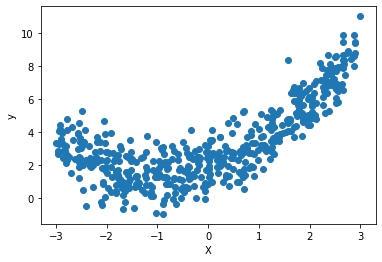

In [18]:
# Generate non-linear data
m = 500
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

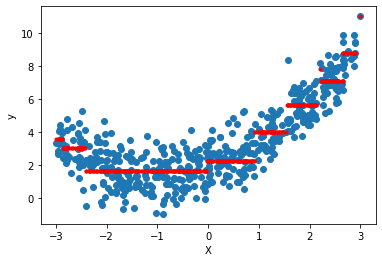

In [19]:
# Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT)
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)
# Train a second DecisionTreeRegressor on the residual errors made by the first predictor
y2 = [x1 - x2 for (x1, x2) in zip(y, tree_reg1.predict(X))] #y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)
# Train a third regressor on the residual errors made by the second predictor
y3 = [x1 - x2 for (x1, x2) in zip(y2, tree_reg2.predict(X))] #y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

# Prediction
y_predict = [sum(tree.predict([new_data]) for tree in (tree_reg1, tree_reg2, tree_reg3)) for new_data in X]

plt.scatter(X, y)
plt.plot(X, y_predict, "r.")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

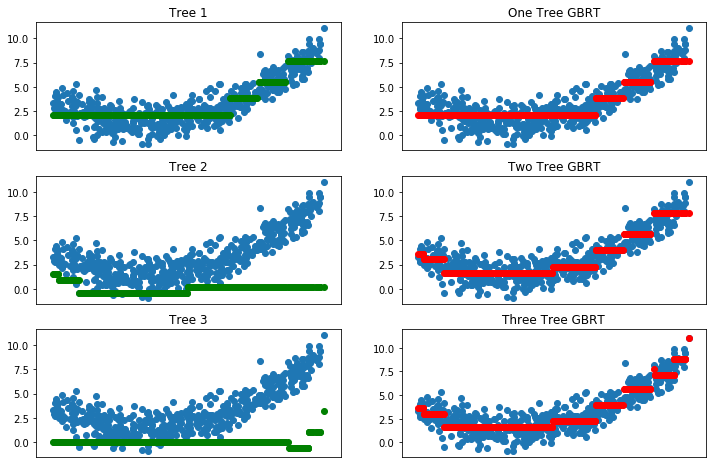

In [20]:
# Performance comparison as the residual error trees are added.
fig, ax = plt.subplots(3, 2,figsize=(12, 8))

def plot_prediction(X, y, trees, title, color, pos1, pos2):
    ax[pos1, pos2].scatter(X, y)
    ax[pos1, pos2].scatter(X, [sum(tree.predict([new_data]) for tree in trees) for new_data in X], c=color)
    ax[pos1, pos2].set_title(title)
    ax[pos1, pos2].set_xticks([])

plot_prediction(X, y, (tree_reg1, ), 'Tree 1', 'green', 0, 0)
plot_prediction(X, y, (tree_reg1, ), 'One Tree GBRT', 'red', 0, 1)
plot_prediction(X, y, (tree_reg2, ), 'Tree 2', 'green', 1, 0)
plot_prediction(X, y, (tree_reg1, tree_reg2), 'Two Tree GBRT', 'red', 1, 1)
plot_prediction(X, y, (tree_reg3, ), 'Tree 3', 'green', 2, 0)
plot_prediction(X, y, (tree_reg1, tree_reg2, tree_reg3), 'Three Tree GBRT', 'red', 2, 1)
plt.show()

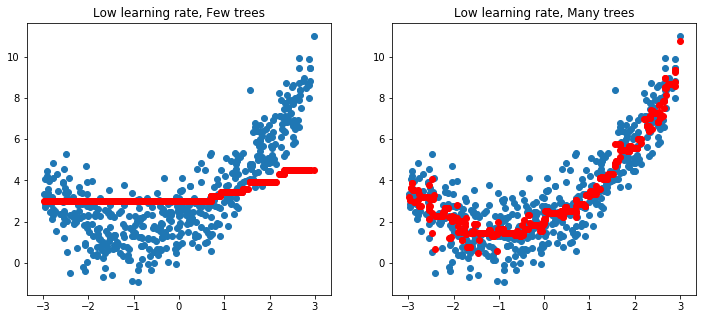

In [21]:
# Implementation on sklearn -  GradientBoostingRegressor class
# Base estimator is always decision tree.
# It has hyperparameters to control the growth of Decision Trees and to control the ensemble training (n_estimators)

# The learning_rate hyperparameter scales the contribution of each tree.
# low learning rate will need more trees in the ensemble to fit the training set.
# But the predictions will usually generalize better - technique is called "shrinkage".

from sklearn.ensemble import GradientBoostingRegressor
gbrt1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1)
gbrt1.fit(X, y.ravel())
gbrt1_pred = gbrt1.predict(X)

gbrt2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1)
gbrt2.fit(X, y.ravel())
gbrt2_pred = gbrt2.predict(X)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].scatter(X, y)
ax[0].scatter(X, gbrt1_pred, c='red')
ax[0].set_title('Low learning rate, Few trees')

ax[1].scatter(X, y)
ax[1].scatter(X, gbrt2_pred, c='red')
ax[1].set_title('Low learning rate, Many trees')
plt.show()

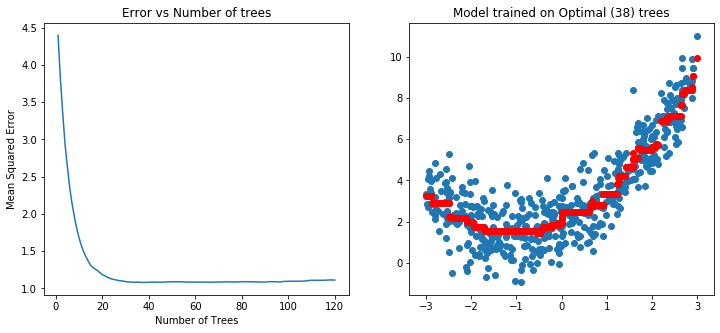

In [22]:
# We can use early stopping to find optimal number of trees.
# Can be implemented using staged_predict() method
# It returns an iterator over the predictions made by the ensemble at each stage of training (with one tree, two trees, etc.)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train.ravel())

# Find error at each stage
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
# Get minimum error index
bst_n_estimators = np.argmin(errors)+1 # index 0 means 1 tree

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train.ravel())

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(list(range(1,121)), errors)
ax[0].set_xlabel('Number of Trees')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Error vs Number of trees')

ax[1].scatter(X, y)
ax[1].scatter(X, gbrt_best.predict(X), c='red')
ax[1].set_title('Model trained on Optimal ('+str(bst_n_estimators)+') trees')
plt.show()

In [23]:
# Instead of looking back we can actually stop the training early
# This can be done using warm_start hyperparameter and deepcopy.
from copy import deepcopy
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 121):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train.ravel())
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
        gbrt_best = deepcopy(gbrt)
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping on 5 cont. error increase
            
gbrt_best
# Training only done on n+5 trees for finalizing a n tree model, saves time.

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=38,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=True)

<b>Stochastic Gradient Boosting</b> - fraction of training instances to be used for training each tree.
- <b>subsample hyperparameter</b> is supported by GradientBoostingRegressor class.
- subsample=0.25, then each tree is trained on 25% of the training instances, selected randomly.
- This trades a <b>higher bias for a lower variance</b>. It also speeds up training considerably.
-------------------------------------------------------------------------------------------------------------------------
** It is possible to use Gradient Boosting with other cost functions. This is controlled by the loss hyperparameter.

### Stacking
<b>Stacked Generalization</b><br>
- Instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble, we train a model to perform this aggregation.
-  final predictor is called a <b>blender, or a meta learner</b>. It takes predictions as inputs and makes the final prediction.
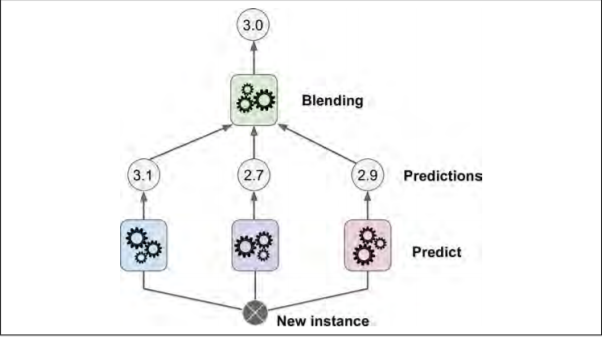
<br><br>

<b><u>Hold-out set</u></b> - To train the blender.
- The training set is split in two subsets. The first subset is used to train the predictors in the first layer.
- Blender is trained, where <b>actual values of Hold out set and prediction of each of the predictors</b> are used as features.
- It is possible to use out-of-fold (like k-fold) predictions. In some contexts this is called stacking, while using a hold-out set is called blending. Most of the places both are synonyms.
<br><br>

<u><b>Predictions in a multilayer stacking ensemble</b></u><br>
It is actually possible to train several different blenders this way (e.g., one using Linear Regression, another using Random Forest Regression, and so on): we get a whole layer of blenders.
- For one layer of predictors and two layers of Blenders we need 3 subsets of data.
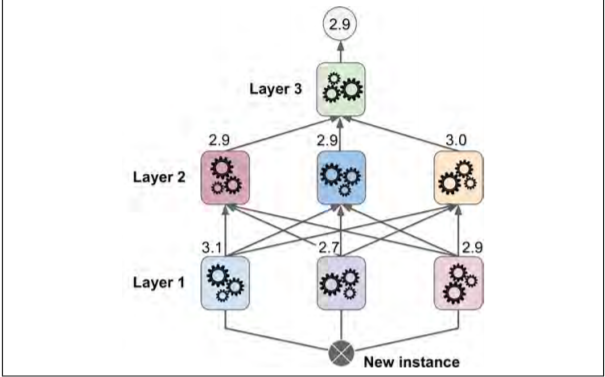
<br><br>

Scikit-Learn does not support stacking directly, but we can implement our own.<br>
We can use an open source implementation such as brew (available at https://github.com/viisar/brew).